In [1]:
import os
os.chdir('/umbc/xfs1/cybertrn/users/tchapma1/research/synthetic_data/')

In [2]:
MODEL_NAME = "localization_inceptionv3_transfer"
MODEL_VERSION = "simple_coords_0.03_lrplateau"
DATASET_NAME_AND_PARAMS = "fft_data_256"
LABEL_SET_NAME = "2018"
NUM_EPOCHS = 300
PREV_EPOCHS = 300
PREV_LABELSET = "simple_synthetic_2018"

MODEL_NAME_AND_VERSION = "{}-{}".format( MODEL_NAME, MODEL_VERSION )

In [3]:
exec('import models.{} as model_root'.format(MODEL_NAME))

from utils.paths import getTrainingLogRoot
run_id = "{}/{}/{}/{}-{}/".format( MODEL_NAME_AND_VERSION, DATASET_NAME_AND_PARAMS, LABEL_SET_NAME, NUM_EPOCHS, PREV_EPOCHS )

# run_id = "localization_inceptionv3-{}/fft_data_256-rgb-no_rescale-no_normalize/simple_synthetic_2018/{}".format(getVersion(),str(n))
root = getTrainingLogRoot(run_id)
target_dir = root + sorted(os.listdir(root), key = lambda x: os.stat(root+x).st_mtime, reverse = True)[0] + "/"

the_model = model_root.getModel(n_epochs=PREV_EPOCHS, dataset_name=DATASET_NAME_AND_PARAMS, label_set=PREV_LABELSET)
the_model.load_weights(target_dir + "best_model/")
the_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 256, 256, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 6, 6, 40)          81920     
_________________________________________________________________
flatten (Flatten)            (None, 1440)             

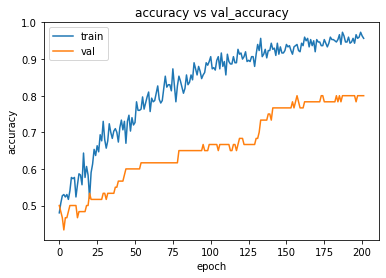

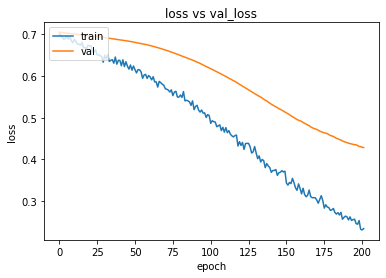

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

metrics_df = pd.read_csv( target_dir + "metrics.csv" )
metrics_df

def doPlot(a,b,c=0):
    plt.plot(list(range(len(metrics_df)))[c:], metrics_df[a][c:])
    plt.plot(list(range(len(metrics_df)))[c:], metrics_df[b][c:])
    plt.title(a + " vs " + b)
    plt.ylabel(a)
    plt.xlabel('epoch')
    plt.legend(['train', 'val', 'baseline'], loc='upper left')
    plt.show()

doPlot("accuracy","val_accuracy")
doPlot("loss","val_loss")
# doPlot("IOU_metric","val_IOU_metric")

In [5]:
from data_loaders.minimal_load_labeled_data import getData
train, val, test = getData(DATASET_NAME_AND_PARAMS, LABEL_SET_NAME, 256)

Found 300 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


In [6]:
the_model.evaluate( test )

100/100 [==============================] - 4s 44ms/step - loss: 0.5304 - accuracy: 0.7500


[0.5304399728775024, 0.75]

In [7]:
the_model.evaluate( train )

10/10 [==============================] - 9s 900ms/step - loss: 0.2199 - accuracy: 0.9767


[0.21990498900413513, 0.9766666889190674]

In [8]:
the_model.evaluate( val )

60/60 [==============================] - 3s 43ms/step - loss: 0.4282 - accuracy: 0.8000


[0.4282490015029907, 0.800000011920929]

In [9]:
import numpy as np
## calculate f1 score...
true_classes = test.classes
preds = np.round(the_model.predict( test )).reshape(-1)

pos = 0

pos_preds = np.sum(preds == pos)
true_pos = np.sum((preds == pos) & (preds == true_classes))
ground_truth_pos = np.sum(np.array(true_classes) == pos)
print( ground_truth_pos, true_pos, pos_preds)
f_score = 2/(pos_preds/true_pos + ground_truth_pos/true_pos)
f_score

50 38 51


0.7524752475247525

In [10]:
print( target_dir )

../logs/synthetic_data//localization_inceptionv3_transfer-simple_coords_0.03_lrplateau/fft_data_256/2018/300-300//20220801-130942/


In [11]:
import os
os.chdir('/umbc/xfs1/cybertrn/users/tchapma1/research/synthetic_data/')

In [12]:
MODEL_NAME = "localization_inceptionv3_baseline"
MODEL_VERSION = "simple_coords_0.03_lrplateau"
DATASET_NAME_AND_PARAMS = "fft_data_256"
LABEL_SET_NAME = "2018"
NUM_EPOCHS = 300


MODEL_NAME_AND_VERSION = "{}-{}".format( MODEL_NAME, MODEL_VERSION )

In [13]:
exec('from models.{} import getModel, evaluateModel, getVersion, getDataType'.format(MODEL_NAME))

from utils.paths import getTrainingLogRoot
run_id = "{}/{}/{}/{}/".format( MODEL_NAME_AND_VERSION, DATASET_NAME_AND_PARAMS, LABEL_SET_NAME, NUM_EPOCHS )
# run_id = "localization_inceptionv3-{}/fft_data_256-rgb-no_rescale-no_normalize/simple_synthetic_2018/{}".format(getVersion(),str(n))
root = getTrainingLogRoot(run_id)
target_dir = root + sorted(os.listdir(root), key = lambda x: os.stat(root+x).st_mtime, reverse = True)[0] + "/"

model = getModel()
model.load_weights(target_dir + "best_model/")
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 256, 256, 3)]     0         
_________________________________________________________________
functional_3 (Functional)    (None, 14, 14, 768)       8975264   
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 14, 14, 10)        7680      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)             

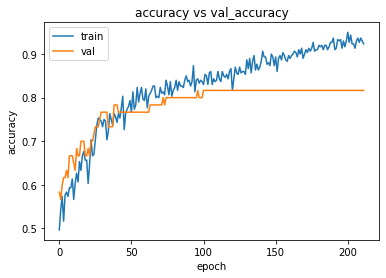

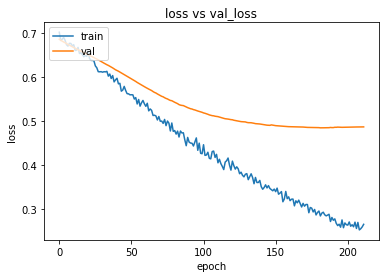

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

metrics_df = pd.read_csv( target_dir + "metrics.csv" )
metrics_df

def doPlot(a,b,c=0):
    plt.plot(list(range(len(metrics_df)))[c:], metrics_df[a][c:])
    plt.plot(list(range(len(metrics_df)))[c:], metrics_df[b][c:])
    plt.title(a + " vs " + b)
    plt.ylabel(a)
    plt.xlabel('epoch')
    plt.legend(['train', 'val', 'baseline'], loc='upper left')
    plt.show()

doPlot("accuracy","val_accuracy")
doPlot("loss","val_loss")
# doPlot("IOU_metric","val_IOU_metric")

In [15]:
from data_loaders.load_data import getData
train, val, test = getData(getDataType(), DATASET_NAME_AND_PARAMS, LABEL_SET_NAME)

ModuleNotFoundError: No module named 'data_loaders.load_data'

In [ ]:
model.evaluate( test )

In [ ]:
model.evaluate( val )

In [ ]:
model.evaluate( train )

In [ ]:
import numpy as np
## calculate f1 score...
true_classes = test.classes
preds = np.round(model.predict( test )).reshape(-1)

pos = 0

pos_preds = np.sum(preds == pos)
true_pos = np.sum((preds == pos) & (preds == true_classes))
ground_truth_pos = np.sum(np.array(true_classes) == pos)
print( ground_truth_pos, true_pos, pos_preds)
f_score = 2/(pos_preds/true_pos + ground_truth_pos/true_pos)
f_score